In [1]:
import nnabla as nn
import numpy as np
import os
from nnabla.utils.image_utils import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import random

2025-02-20 17:33:02,127 [nnabla][INFO]: Initializing CPU extension...


In [2]:
# Load the pre-trained ResNet-50 model
from nnabla.models.imagenet import ResNet152
model = ResNet152()

# Define the path to the extracted dataset
dataset_path = 'C:/Users/wingi/DeepArch/arcDataset'

# List all subdirectories (each representing a class)
styles = os.listdir(dataset_path)

# Define the target image size (e.g., 224x224 for ResNet-50)
target_size = (224, 224)

2025-02-20 17:33:08,443 [nnabla][INFO]: Downloading Resnet-152.nnp from https://nnabla.org/pretrained-models/nnp_models/imagenet/Resnet-152/Resnet-152.nnp


2025-02-20 17:33:08,443 [nnabla][INFO]: > C:\Users\wingi/nnabla_data\nnp_models\imagenet/Resnet-152.nnp already exists.
2025-02-20 17:33:08,443 [nnabla][INFO]: > If you have any issue when using this file, 
2025-02-20 17:33:08,444 [nnabla][INFO]: > manually remove the file and try download again.


Loading C:\Users\wingi/nnabla_data\nnp_models\imagenet/Resnet-152.nnp.


In [3]:
# Initialize lists to hold image data and corresponding labels
image_data = []
labels = []

# Initialize counter for skipped images
skipped_images = 0

# Function to resize and preprocess images
def preprocess_image(image_path, target_size):
    global skipped_images
    # Open the image using PIL
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}. Skipping.")
        skipped_images += 1
        return None
    
    # Resize the image
    img = img.resize(target_size)
    
    # Convert the image to numpy array
    img_array = np.array(img)
    
    # Check if the image has 3 channels (RGB)
    if img_array.shape[-1] != 3:
        print(f"Warning: Skipping image {image_path} as it doesn't have 3 channels.")
        skipped_images += 1
        return None
    
    # Convert to the appropriate format (e.g., channels-first)
    img_array = np.transpose(img_array, (2, 0, 1))  # (H, W, C) -> (C, H, W)
    return img_array

# Iterate through each style directory
for style in styles:
    style_path = os.path.join(dataset_path, style)
    if os.path.isdir(style_path):
        # List all image files in the directory
        image_files = [f for f in os.listdir(style_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        for image_file in image_files:
            image_path = os.path.join(style_path, image_file)
            # Preprocess the image
            img = preprocess_image(image_path, target_size)
            if img is None:
                continue  # Skip if preprocessing failed
            image_data.append(img)
            labels.append(style)

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)
print(f"Processed {len(image_data)} images.")
print(f"Skipped {skipped_images} images due to errors.")

Error opening image C:/Users/wingi/DeepArch/arcDataset\Byzantine architecture\1661_800px-%D0%A3%D1%81%D0%BF%D0%B5%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%81%D0%BE%D0%B1%D0%BE%D1%80_%28%D0%98%D0%B2%D0%B5%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%BC%D0%BE%D0%BD%D0%B0%D1%81%D1%82%D1%8B%D1%80%D1%8C%29.jpg: [Errno 2] No such file or directory: 'C:\\Users\\wingi\\DeepArch\\arcDataset\\Byzantine architecture\\1661_800px-%D0%A3%D1%81%D0%BF%D0%B5%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%81%D0%BE%D0%B1%D0%BE%D1%80_%28%D0%98%D0%B2%D0%B5%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%BC%D0%BE%D0%BD%D0%B0%D1%81%D1%82%D1%8B%D1%80%D1%8C%29.jpg'. Skipping.
Error opening image C:/Users/wingi/DeepArch/arcDataset\Russian Revival architecture\1337_800px-%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2._%D0%A6%D0%B5%D1%80%D0%BA%D0%BE%D0%B2%D1%8C_%D0%A1%D0%B5%D1%80%D0%B0%D1%84%D0%B8%D0%BC%D0%B0_%D0%A1%D0%B0%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE..jpg: [Errno 2] No such file or directory: 'C:\\Users\\wingi\\DeepArc

Counter({'Art Nouveau architecture': 444, 'Queen Anne architecture': 421, 'Art Deco architecture': 360, 'Greek Revival architecture': 311, 'Ancient Egyptian architecture': 256, 'Baroque architecture': 238, 'Deconstructivism': 212, 'Novelty architecture': 207, 'International style': 203, 'American craftsman style': 195, 'Beaux-Arts architecture': 190, 'Colonial architecture': 174, 'Postmodern architecture': 163, 'Tudor Revival architecture': 162, 'Russian Revival architecture': 155, 'Georgian architecture': 152, 'Chicago school architecture': 145, 'Palladian architecture': 113, 'Byzantine architecture': 110, 'Gothic architecture': 108, 'Romanesque architecture': 107, 'Bauhaus architecture': 87, 'Edwardian architecture': 79, 'Achaemenid architecture': 69, 'American Foursquare architecture': 59})


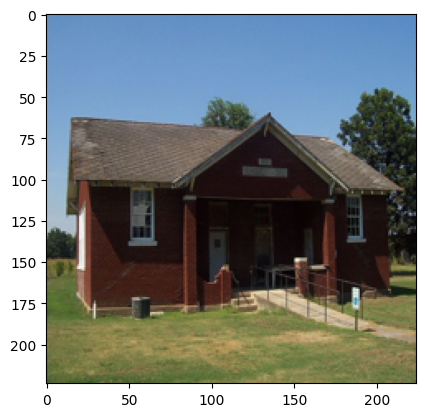

In [4]:
# For numpy random operations
np.random.seed(42)  
random.seed(42) 

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Show label distribution
print(Counter(labels))

# Show sample image
image_data.shape
example = image_data[100]
plt.imshow(example.transpose(1,2,0))

In [5]:
# Function to get embeddings in mini-batches with tqdm progress bar
def get_embeddings_in_batches(image_data, batch_size):
    embeddings_list = []
    # Wrap the image data loop with tqdm to show progress
    with tqdm(total=len(image_data) // batch_size, desc="Generating Embeddings", ncols=100, dynamic_ncols=True, leave=True) as pbar:
        # Process images in mini-batches to avoid memory overload
        for i in range(0, len(image_data), batch_size):
            batch = image_data[i:i+batch_size]
            x = nn.Variable(batch.shape)
            x.d = batch
            
            # Forward pass through the model to get embeddings
            embeddings = model(x, training=False, use_up_to='pool')
            embeddings.forward()
            embeddings = embeddings.d
            
            embeddings_list.append(embeddings)
            del embeddings  # Free up memory after each batch
            
            pbar.update(1)  # Increment progress bar after each batch
    
    # Concatenate all embeddings from batches and return them
    return np.concatenate(embeddings_list, axis=0)

# Get embeddings in batches
batch_size = 32  # You can adjust the batch size based on your available memory
embeddings = get_embeddings_in_batches(image_data, batch_size)



Generating Embeddings: 148it [1:03:13, 25.63s/it]                         


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np

# Flatten the embeddings to 2D array (N, C * H * W)
N, C, H, W = embeddings.shape
embeddings_flat = embeddings.reshape(N, C * H * W)
print(f"Flattened embeddings shape: {embeddings_flat.shape}")

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the embeddings and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_flat, labels_encoded, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for mini-batch training
batch_size = 32
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define the MLP model with Dropout and L2 regularization
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Output layer
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with 50% probability

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = self.dropout(x)  # Apply dropout during training
        x = self.fc2(x)  # Output layer
        return x

# Model initialization with L2 regularization and Dropout
model = MLP(input_size=X_train.shape[1], hidden_size=512, output_size=len(np.unique(y_train)))

# L2 regularization (weight decay) and Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)  # weight_decay is L2 regularization

# Model initialization
input_size = X_train.shape[1]  # Input size is the flattened embeddings
hidden_size = 512             # Number of neurons in the hidden layer
output_size = len(np.unique(y_train))  # Number of classes

model = MLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Store accuracy values for plotting later
train_accuracies_batch = []  # Accuracy after each mini-batch
test_accuracies_batch = []   # Accuracy after each mini-batch
train_accuracies_epoch = []  # Accuracy after each epoch
test_accuracies_epoch = []   # Accuracy after each epoch

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set model to training mode
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Inside the training loop
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}", ncols=100, dynamic_ncols=True, leave=True) as pbar:
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update progress bar
            pbar.update(1)

            if i % 10 == 0:  # Print progress every 10 batches
                print(f"Processed batch {i}/{len(train_loader)}")

            # Evaluate accuracy after each mini-batch
            with torch.no_grad():  # No need to compute gradients for evaluation
                y_pred_train = torch.argmax(model(X_train_tensor), dim=1)
                train_acc = accuracy_score(y_train_tensor, y_pred_train)
                train_accuracies_batch.append(train_acc)

                y_pred_test = torch.argmax(model(X_test_tensor), dim=1)
                test_acc = accuracy_score(y_test_tensor, y_pred_test)
                test_accuracies_batch.append(test_acc)
    
    # Evaluate accuracy after each epoch
    model.eval()  # Set model to evaluation mode (no dropout, etc.)
    with torch.no_grad():
        y_pred_train = torch.argmax(model(X_train_tensor), dim=1)
        train_acc_epoch = accuracy_score(y_train_tensor, y_pred_train)
        train_accuracies_epoch.append(train_acc_epoch)

        y_pred_test = torch.argmax(model(X_test_tensor), dim=1)
        test_acc_epoch = accuracy_score(y_test_tensor, y_pred_test)
        test_accuracies_epoch.append(test_acc_epoch)



Flattened embeddings shape: (4720, 2048)
Epoch 1/10


Epoch 1:   4%|▍         | 5/118 [00:00<00:07, 15.73it/s]

Processed batch 0/118


Epoch 1:  15%|█▌        | 18/118 [00:00<00:03, 31.79it/s]

Processed batch 10/118


Epoch 1:  23%|██▎       | 27/118 [00:00<00:02, 36.66it/s]

Processed batch 20/118


Epoch 1:  31%|███       | 36/118 [00:01<00:02, 39.24it/s]

Processed batch 30/118


Epoch 1:  38%|███▊      | 45/118 [00:01<00:01, 38.45it/s]

Processed batch 40/118


Epoch 1:  46%|████▌     | 54/118 [00:01<00:01, 38.72it/s]

Processed batch 50/118


Epoch 1:  58%|█████▊    | 69/118 [00:01<00:01, 40.47it/s]

Processed batch 60/118


Epoch 1:  67%|██████▋   | 79/118 [00:02<00:00, 39.87it/s]

Processed batch 70/118


Epoch 1:  71%|███████   | 84/118 [00:02<00:00, 40.40it/s]

Processed batch 80/118


Epoch 1:  83%|████████▎ | 98/118 [00:02<00:00, 40.22it/s]

Processed batch 90/118


Epoch 1:  92%|█████████▏| 108/118 [00:02<00:00, 39.49it/s]

Processed batch 100/118


Epoch 1:  99%|█████████▉| 117/118 [00:03<00:00, 39.55it/s]

Processed batch 110/118


Epoch 1: 100%|██████████| 118/118 [00:03<00:00, 36.27it/s]


Epoch 2/10


Epoch 2:   5%|▌         | 6/118 [00:00<00:02, 49.89it/s]

Processed batch 0/118


Epoch 2:  14%|█▎        | 16/118 [00:00<00:02, 42.93it/s]

Processed batch 10/118


Epoch 2:  22%|██▏       | 26/118 [00:00<00:02, 39.74it/s]

Processed batch 20/118


Epoch 2:  31%|███       | 36/118 [00:00<00:02, 39.58it/s]

Processed batch 30/118


Epoch 2:  38%|███▊      | 45/118 [00:01<00:01, 39.77it/s]

Processed batch 40/118


Epoch 2:  47%|████▋     | 55/118 [00:01<00:01, 38.82it/s]

Processed batch 50/118


Epoch 2:  55%|█████▌    | 65/118 [00:01<00:01, 39.54it/s]

Processed batch 60/118


Epoch 2:  64%|██████▎   | 75/118 [00:01<00:01, 39.58it/s]

Processed batch 70/118


Epoch 2:  75%|███████▌  | 89/118 [00:02<00:00, 40.58it/s]

Processed batch 80/118


Epoch 2:  84%|████████▍ | 99/118 [00:02<00:00, 39.62it/s]

Processed batch 90/118


Epoch 2:  92%|█████████▏| 109/118 [00:02<00:00, 41.11it/s]

Processed batch 100/118


Epoch 2:  97%|█████████▋| 114/118 [00:02<00:00, 39.80it/s]

Processed batch 110/118


Epoch 2: 100%|██████████| 118/118 [00:02<00:00, 39.80it/s]


Epoch 3/10


Epoch 3:   4%|▍         | 5/118 [00:00<00:02, 46.84it/s]

Processed batch 0/118


Epoch 3:  13%|█▎        | 15/118 [00:00<00:02, 40.88it/s]

Processed batch 10/118


Epoch 3:  21%|██        | 25/118 [00:00<00:02, 40.12it/s]

Processed batch 20/118


Epoch 3:  30%|██▉       | 35/118 [00:00<00:02, 39.67it/s]

Processed batch 30/118


Epoch 3:  42%|████▏     | 49/118 [00:01<00:01, 39.63it/s]

Processed batch 40/118


Epoch 3:  48%|████▊     | 57/118 [00:01<00:01, 38.41it/s]

Processed batch 50/118


Epoch 3:  56%|█████▌    | 66/118 [00:01<00:01, 39.23it/s]

Processed batch 60/118


Epoch 3:  64%|██████▎   | 75/118 [00:01<00:01, 39.60it/s]

Processed batch 70/118


Epoch 3:  72%|███████▏  | 85/118 [00:02<00:00, 40.65it/s]

Processed batch 80/118


Epoch 3:  81%|████████  | 95/118 [00:02<00:00, 39.97it/s]

Processed batch 90/118


Epoch 3:  89%|████████▉ | 105/118 [00:02<00:00, 39.86it/s]

Processed batch 100/118


Epoch 3:  97%|█████████▋| 115/118 [00:02<00:00, 39.02it/s]

Processed batch 110/118


Epoch 3: 100%|██████████| 118/118 [00:02<00:00, 39.46it/s]


Epoch 4/10


Epoch 4:   5%|▌         | 6/118 [00:00<00:02, 47.97it/s]

Processed batch 0/118


Epoch 4:  14%|█▎        | 16/118 [00:00<00:02, 41.49it/s]

Processed batch 10/118


Epoch 4:  22%|██▏       | 26/118 [00:00<00:02, 40.16it/s]

Processed batch 20/118


Epoch 4:  31%|███       | 36/118 [00:00<00:01, 41.24it/s]

Processed batch 30/118


Epoch 4:  38%|███▊      | 45/118 [00:01<00:01, 39.62it/s]

Processed batch 40/118


Epoch 4:  47%|████▋     | 55/118 [00:01<00:01, 40.34it/s]

Processed batch 50/118


Epoch 4:  55%|█████▌    | 65/118 [00:01<00:01, 39.40it/s]

Processed batch 60/118


Epoch 4:  63%|██████▎   | 74/118 [00:01<00:01, 39.31it/s]

Processed batch 70/118


Epoch 4:  74%|███████▎  | 87/118 [00:02<00:00, 39.56it/s]

Processed batch 80/118


Epoch 4:  81%|████████▏ | 96/118 [00:02<00:00, 39.86it/s]

Processed batch 90/118


Epoch 4:  89%|████████▉ | 105/118 [00:02<00:00, 39.93it/s]

Processed batch 100/118


Epoch 4:  97%|█████████▋| 114/118 [00:02<00:00, 38.98it/s]

Processed batch 110/118


Epoch 4: 100%|██████████| 118/118 [00:02<00:00, 39.54it/s]


Epoch 5/10


Epoch 5:   5%|▌         | 6/118 [00:00<00:02, 45.83it/s]

Processed batch 0/118


Epoch 5:  14%|█▎        | 16/118 [00:00<00:02, 41.93it/s]

Processed batch 10/118


Epoch 5:  22%|██▏       | 26/118 [00:00<00:02, 41.34it/s]

Processed batch 20/118


Epoch 5:  31%|███       | 36/118 [00:00<00:02, 39.80it/s]

Processed batch 30/118


Epoch 5:  38%|███▊      | 45/118 [00:01<00:01, 40.08it/s]

Processed batch 40/118


Epoch 5:  47%|████▋     | 55/118 [00:01<00:01, 39.93it/s]

Processed batch 50/118


Epoch 5:  55%|█████▌    | 65/118 [00:01<00:01, 38.61it/s]

Processed batch 60/118


Epoch 5:  66%|██████▌   | 78/118 [00:01<00:01, 38.91it/s]

Processed batch 70/118


Epoch 5:  74%|███████▎  | 87/118 [00:02<00:00, 38.58it/s]

Processed batch 80/118


Epoch 5:  82%|████████▏ | 97/118 [00:02<00:00, 39.05it/s]

Processed batch 90/118


Epoch 5:  91%|█████████ | 107/118 [00:02<00:00, 39.97it/s]

Processed batch 100/118


Epoch 5:  99%|█████████▉| 117/118 [00:02<00:00, 38.81it/s]

Processed batch 110/118


Epoch 5: 100%|██████████| 118/118 [00:02<00:00, 39.55it/s]


Epoch 6/10


Epoch 6:   5%|▌         | 6/118 [00:00<00:02, 46.20it/s]

Processed batch 0/118


Epoch 6:  14%|█▎        | 16/118 [00:00<00:02, 41.64it/s]

Processed batch 10/118


Epoch 6:  22%|██▏       | 26/118 [00:00<00:02, 40.39it/s]

Processed batch 20/118


Epoch 6:  31%|███       | 36/118 [00:00<00:02, 40.30it/s]

Processed batch 30/118


Epoch 6:  39%|███▉      | 46/118 [00:01<00:01, 38.94it/s]

Processed batch 40/118


Epoch 6:  47%|████▋     | 55/118 [00:01<00:01, 38.99it/s]

Processed batch 50/118


Epoch 6:  58%|█████▊    | 68/118 [00:01<00:01, 39.04it/s]

Processed batch 60/118


Epoch 6:  65%|██████▌   | 77/118 [00:01<00:01, 38.58it/s]

Processed batch 70/118


Epoch 6:  73%|███████▎  | 86/118 [00:02<00:00, 37.87it/s]

Processed batch 80/118


Epoch 6:  80%|███████▉  | 94/118 [00:02<00:00, 38.08it/s]

Processed batch 90/118


Epoch 6:  91%|█████████ | 107/118 [00:02<00:00, 37.11it/s]

Processed batch 100/118


Epoch 6:  98%|█████████▊| 116/118 [00:03<00:00, 36.31it/s]

Processed batch 110/118


Epoch 6: 100%|██████████| 118/118 [00:03<00:00, 38.34it/s]


Epoch 7/10


Epoch 7:   4%|▍         | 5/118 [00:00<00:02, 42.14it/s]

Processed batch 0/118


Epoch 7:  12%|█▏        | 14/118 [00:00<00:02, 37.72it/s]

Processed batch 10/118


Epoch 7:  23%|██▎       | 27/118 [00:00<00:02, 36.70it/s]

Processed batch 20/118


Epoch 7:  30%|██▉       | 35/118 [00:00<00:02, 36.21it/s]

Processed batch 30/118


Epoch 7:  40%|███▉      | 47/118 [00:01<00:02, 33.87it/s]

Processed batch 40/118


Epoch 7:  47%|████▋     | 55/118 [00:01<00:01, 33.72it/s]

Processed batch 50/118


Epoch 7:  57%|█████▋    | 67/118 [00:01<00:01, 33.62it/s]

Processed batch 60/118


Epoch 7:  64%|██████▎   | 75/118 [00:02<00:01, 33.31it/s]

Processed batch 70/118


Epoch 7:  74%|███████▎  | 87/118 [00:02<00:00, 32.21it/s]

Processed batch 80/118


Epoch 7:  81%|████████  | 95/118 [00:02<00:00, 32.48it/s]

Processed batch 90/118


Epoch 7:  91%|█████████ | 107/118 [00:03<00:00, 31.63it/s]

Processed batch 100/118


Epoch 7:  97%|█████████▋| 115/118 [00:03<00:00, 31.75it/s]

Processed batch 110/118


Epoch 7: 100%|██████████| 118/118 [00:03<00:00, 33.44it/s]


Epoch 8/10


Epoch 8:   4%|▍         | 5/118 [00:00<00:02, 42.05it/s]

Processed batch 0/118


Epoch 8:  12%|█▏        | 14/118 [00:00<00:03, 32.93it/s]

Processed batch 10/118


Epoch 8:  22%|██▏       | 26/118 [00:00<00:02, 33.25it/s]

Processed batch 20/118


Epoch 8:  29%|██▉       | 34/118 [00:00<00:02, 34.80it/s]

Processed batch 30/118


Epoch 8:  39%|███▉      | 46/118 [00:01<00:02, 34.05it/s]

Processed batch 40/118


Epoch 8:  49%|████▉     | 58/118 [00:01<00:01, 33.81it/s]

Processed batch 50/118


Epoch 8:  56%|█████▌    | 66/118 [00:01<00:01, 34.22it/s]

Processed batch 60/118


Epoch 8:  63%|██████▎   | 74/118 [00:02<00:01, 34.95it/s]

Processed batch 70/118


Epoch 8:  73%|███████▎  | 86/118 [00:02<00:00, 34.16it/s]

Processed batch 80/118


Epoch 8:  80%|███████▉  | 94/118 [00:02<00:00, 35.16it/s]

Processed batch 90/118


Epoch 8:  90%|████████▉ | 106/118 [00:03<00:00, 34.93it/s]

Processed batch 100/118


Epoch 8: 100%|██████████| 118/118 [00:03<00:00, 35.25it/s]

Processed batch 110/118


Epoch 8: 100%|██████████| 118/118 [00:03<00:00, 34.07it/s]


Epoch 9/10


Epoch 9:   4%|▍         | 5/118 [00:00<00:02, 46.81it/s]

Processed batch 0/118


Epoch 9:  12%|█▏        | 14/118 [00:00<00:02, 37.75it/s]

Processed batch 10/118


Epoch 9:  22%|██▏       | 26/118 [00:00<00:02, 35.85it/s]

Processed batch 20/118


Epoch 9:  32%|███▏      | 38/118 [00:01<00:02, 35.35it/s]

Processed batch 30/118


Epoch 9:  39%|███▉      | 46/118 [00:01<00:02, 34.18it/s]

Processed batch 40/118


Epoch 9:  46%|████▌     | 54/118 [00:01<00:01, 35.59it/s]

Processed batch 50/118


Epoch 9:  56%|█████▌    | 66/118 [00:01<00:01, 32.86it/s]

Processed batch 60/118


Epoch 9:  63%|██████▎   | 74/118 [00:02<00:01, 33.60it/s]

Processed batch 70/118


Epoch 9:  74%|███████▎  | 87/118 [00:02<00:00, 35.06it/s]

Processed batch 80/118


Epoch 9:  81%|████████  | 95/118 [00:02<00:00, 35.09it/s]

Processed batch 90/118


Epoch 9:  92%|█████████▏| 108/118 [00:03<00:00, 35.47it/s]

Processed batch 100/118


Epoch 9:  98%|█████████▊| 116/118 [00:03<00:00, 35.46it/s]

Processed batch 110/118


Epoch 9: 100%|██████████| 118/118 [00:03<00:00, 34.66it/s]


Epoch 10/10


Epoch 10:   4%|▍         | 5/118 [00:00<00:02, 41.94it/s]

Processed batch 0/118


Epoch 10:  12%|█▏        | 14/118 [00:00<00:02, 37.14it/s]

Processed batch 10/118


Epoch 10:  22%|██▏       | 26/118 [00:00<00:02, 33.58it/s]

Processed batch 20/118


Epoch 10:  29%|██▉       | 34/118 [00:00<00:02, 35.34it/s]

Processed batch 30/118


Epoch 10:  39%|███▉      | 46/118 [00:01<00:02, 34.66it/s]

Processed batch 40/118


Epoch 10:  46%|████▌     | 54/118 [00:01<00:01, 34.37it/s]

Processed batch 50/118


Epoch 10:  56%|█████▌    | 66/118 [00:01<00:01, 33.91it/s]

Processed batch 60/118


Epoch 10:  63%|██████▎   | 74/118 [00:02<00:01, 34.76it/s]

Processed batch 70/118


Epoch 10:  73%|███████▎  | 86/118 [00:02<00:00, 33.56it/s]

Processed batch 80/118


Epoch 10:  83%|████████▎ | 98/118 [00:02<00:00, 34.90it/s]

Processed batch 90/118


Epoch 10:  90%|████████▉ | 106/118 [00:03<00:00, 34.53it/s]

Processed batch 100/118


Epoch 10:  97%|█████████▋| 114/118 [00:03<00:00, 33.81it/s]

Processed batch 110/118


Epoch 10: 100%|██████████| 118/118 [00:03<00:00, 34.10it/s]


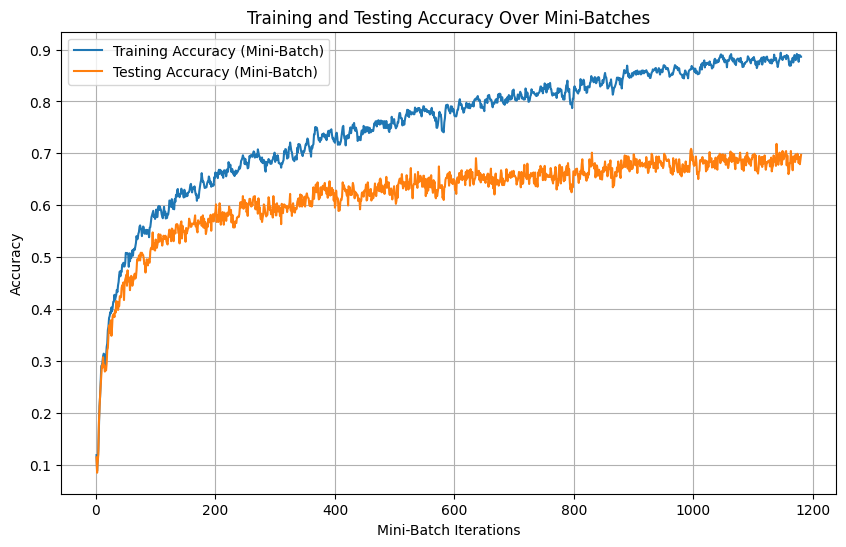

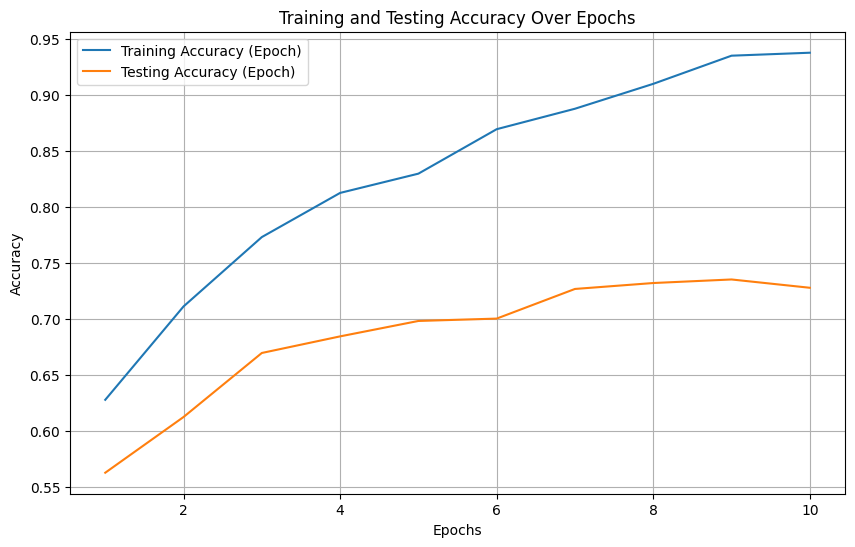

Final Test Accuracy: 72.78%
Final Train Accuracy: 93.78%


In [7]:
# Plot accuracy curves (Mini-Batch Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_batch) + 1), train_accuracies_batch, label="Training Accuracy (Mini-Batch)")
plt.plot(range(1, len(test_accuracies_batch) + 1), test_accuracies_batch, label="Testing Accuracy (Mini-Batch)")
plt.xlabel("Mini-Batch Iterations")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy Over Mini-Batches")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy curves (Epoch Accuracy)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies_epoch) + 1), train_accuracies_epoch, label="Training Accuracy (Epoch)")
plt.plot(range(1, len(test_accuracies_epoch) + 1), test_accuracies_epoch, label="Testing Accuracy (Epoch)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set (using the PyTorch model)
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to track gradients during inference
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)  # Get predicted class by selecting the max output value (logits)
    
# Calculate accuracy
test_acc = accuracy_score(y_test_tensor, y_pred)
print(f'Final Test Accuracy: {test_acc * 100:.2f}%')

# Evaluate on training set (using the PyTorch model)
with torch.no_grad():
    outputs_train = model(X_train_tensor)
    _, y_pred_train = torch.max(outputs_train, 1)
    
train_acc = accuracy_score(y_train_tensor, y_pred_train)
print(f'Final Train Accuracy: {train_acc * 100:.2f}%')



